# スケール・フリーネットワークモデル
3つの代表的なスケール・フリーネットワークモデルを紹介します。

networkxの読み込み

In [1]:
import networkx as nx

その他のライブラリ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Barabasi-Albertモデル

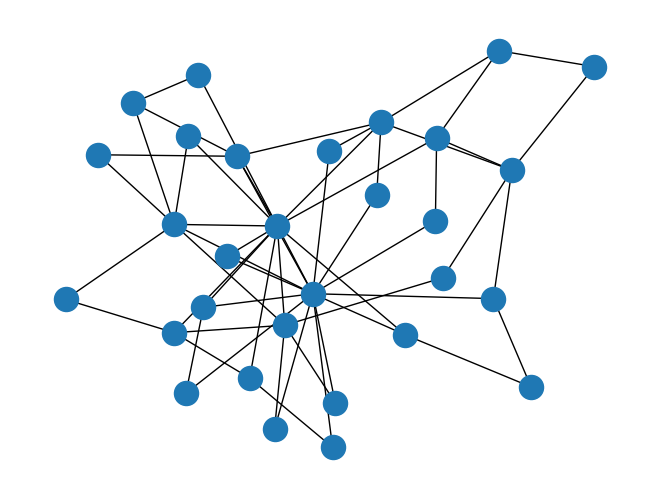

In [3]:
# Barabási-Albertモデルのネットワーク
# n: ノード数
# m: 新規ノードのエッジ数
g = nx.barabasi_albert_graph(n=30, m=2)
# プロット
nx.draw(g)

次数分布

<ipython-input-4-6e2c580d2f91>:17: RuntimeWarning: divide by zero encountered in power
  pk_theory = 2 * 2 * k.astype(np.float64) ** -3


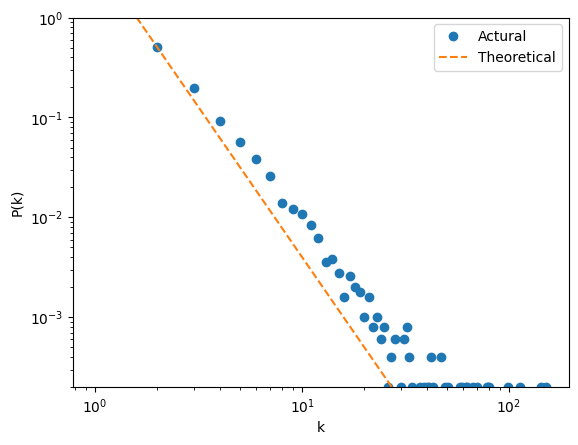

In [4]:
# BAモデルネットワークの生成
g = nx.barabasi_albert_graph(n=5000, m=2)

# 次数分布の計算
degrees = [d for _, d in g.degree()]
max_degree = max(degrees)
k = np.arange(max_degree + 1)

# 次数分布P(k)の計算
degree_count = nx.degree_histogram(g)
degree_dist = np.array(degree_count) / len(g)

# 次数分布のプロット
plt.plot(k, degree_dist, 'o', label='Actural')

# 理論線
pk_theory = 2 * 2 * k.astype(np.float64) ** -3
plt.plot(k, pk_theory, '--', label='Theoretical')

# グラフの設定
plt.xlabel('k')
plt.ylabel('P(k)')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1/5000,1)
plt.legend()

## Chung-Luモデル
networkxでは実装されていないので、igraphを使用

In [5]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.2 MB/s eta 0:00:00


In [6]:
import igraph as ig

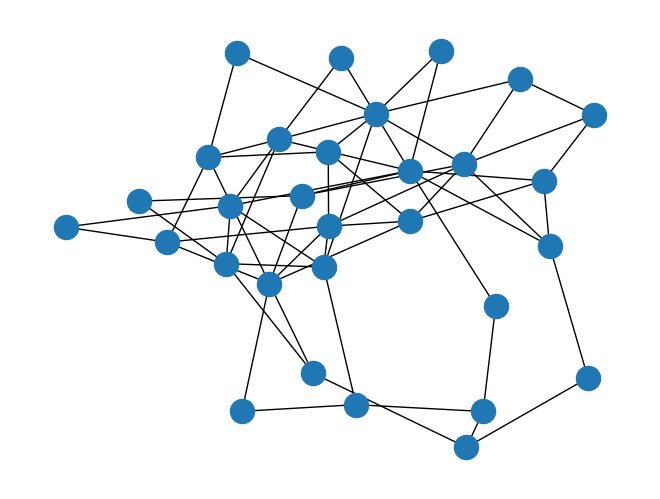

In [7]:
# GraphBase.Static_Power_Law(N, L, gamma)。
# gamma = 1 + 1 / xi
g = ig.GraphBase.Static_Power_Law(30, 60, 2.5, finite_size_correction=True)

# igraph to networkx
edgelist = g.get_edgelist()
g = nx.Graph(edgelist)

# 描画
nx.draw(g)

次数分布

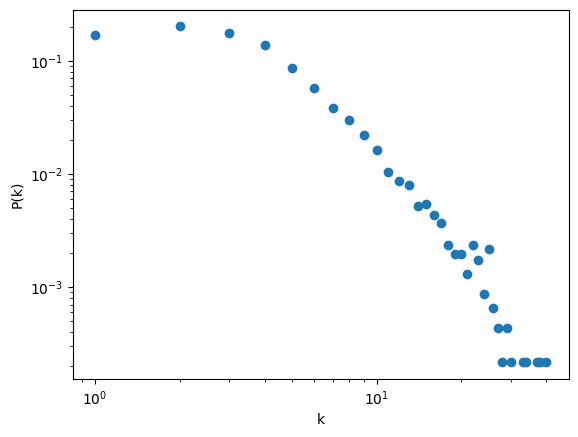

In [8]:
# モデルネットワークの生成
g = ig.GraphBase.Static_Power_Law(5000, 10000, 2.5, finite_size_correction=True)
# igraph to networkx
edgelist = g.get_edgelist()
g = nx.Graph(edgelist)

# 次数分布の計算
degrees = [d for _, d in g.degree()]
max_degree = max(degrees)
k = np.arange(max_degree + 1)

# 次数分布P(k)の計算
degree_count = nx.degree_histogram(g)
degree_dist = np.array(degree_count) / len(g)

# 次数分布のプロット
plt.plot(k, degree_dist, 'o')

# グラフの設定
plt.xlabel('k')
plt.ylabel('P(k)')
plt.xscale('log')
plt.yscale('log')

## コンフィギュレーションモデル

大腸菌のタンパク質相互作用ネットワークを例にする。

ネットワークの読み込み

In [9]:
# エッジリストの読み込み
df = pd.read_csv(f"https://raw.githubusercontent.com/kztakemoto/network-analysis-in-biology/refs/heads/main/data/ecoli_ppi_Hu_etal_2009.txt", sep='\s+', header=None)

# グラフオブジェクトの作成
g = nx.from_pandas_edgelist(df, source=0, target=1)
g = nx.Graph(g)  # 多重エッジを削除
g.remove_edges_from(nx.selfloop_edges(g))  # 自己ループを削除

# 最大連結成分の取得
lcc = max(nx.connected_components(g), key=len)
g = g.subgraph(lcc)

コンフィギュレーションモデルの作成

networkxのコンフィギュレーションモデルは自己ループや多重エッジの生成を許し、サンプリングに偏りがあるという問題があるので、igraphのものを使用

In [10]:
# networkx to igraph
g = ig.Graph.from_networkx(g)
# 次数のベクトルを取得
deg = g.degree()

# コンフィギュレーションモデルの作成
g_rand = ig.Graph.Degree_Sequence(deg, method="vl")
# 次数のベクトルを取得
deg_conf = g_rand.degree()

次数の比較

次数は変わっていないことがわかる。

Text(0, 0.5, 'k_cofiguration')

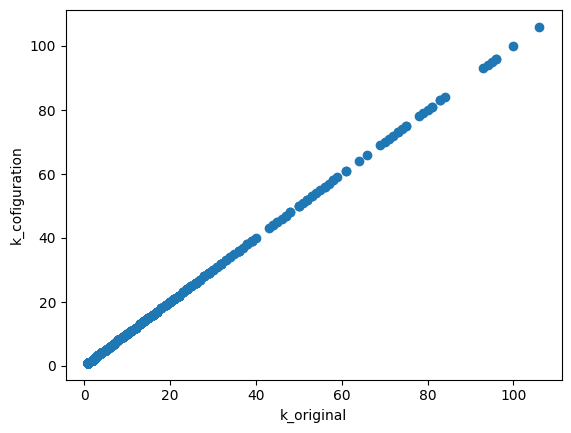

In [11]:
plt.plot(deg, deg_conf, 'o')
plt.xlabel('k_original')
plt.ylabel('k_cofiguration')

平均クラスタ係数の比較

オブジェクトを変換

In [12]:
# igraph to networkx
edgelist = g.get_edgelist()
g = nx.Graph(edgelist)

# igraph to networkx
edgelist = g_rand.get_edgelist()
g_rand = nx.Graph(edgelist)

クラスタ係数の比較

In [13]:
c_ave_original = nx.average_clustering(g)
c_ave_conf = nx.average_clustering(g_rand)
print(f"Orignal network CC: {c_ave_original}\nRandomized neetworks CC: {c_ave_conf}")

Orignal network CC: 0.08163879170553531
Randomized neetworks CC: 0.053706196444626826


## やってみよう
* 平均次数やノード数を変えて，モデルネットワークを描画してみよう。
* Notebookを参考に，別の生物ネットワークを読み込んでコンフィギュレーションモデルのネットワーク指標と比較してみよう（``data``に様々ある）。
* Notebookを参考に，自分のネットワークを使ってコンフィギュレーションモデルでランダムネットワークを作ってみよう。